#### Zadatak 2 - K means algoritam

In [72]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
def sed(x,y): #vraća euklidsku duljinu između dva vektora u obliku lista
    dist=0
    for i in range(len(x)):
        dist = dist + (x[i]-y[i])*(x[i]-y[i])
    return dist

In [9]:
def sad(x,y): #zbraja vektore po kordinatama
        v=[]
        for i in range(len(x)):
                v.append(x[i]+y[i])
        return v

In [97]:
f1 = open("podaci005.txt", "r")
f2 = open("res005++.txt", "w")

noc = int(f1.readline()) #broj centra
nopt = int(f1.readline()) #broj tocaka
dimpt = int(f1.readline()) #dimenzija točaka

noi=50 # broj iteracija, modificirati po potrebi
x=[]

#čitamo datoteku
for i in range(nopt):
    line=f1.readline() 
    vector=line.split() 
    x.append(vector) 
for i in range(nopt):
        for j in range(dimpt):
                x[i][j]=float(x[i][j])

In [98]:
# inicijalizacija centara za k-means++
def initialize(X, K):
    C = [X[random.randint(0, nopt - 1)]]
    for k in range(1, K):
        #print(k)
        D = []
        # prvo odredimo najmanje udaljenosti od vec izabranih sredista
        for i in range(nopt):
            cl_point = 0
            cl_dist = sed(X[i], C[0])
            for j in range(len(C)):
                temp_dist = sed(X[i], C[j])
                if temp_dist < cl_dist:
                    cl_dist = temp_dist
                    cl_point = j
            D.append(cl_dist)
        # sad biramo novu tocku na radnom nacin pomocu distribucije proporcionalne s D^2 (u nasem slucaju je to upravo D)
        # prvo nademo sumu da odredimo koji dio vjerojatnosti pripada danim tockama
        # potom idemo po svim tockama i akumuliramo globalnu vjerojatnost dok ne prijedemo danu radnom vrijednost
        sum_dist = sum(D)
        r = random.random()
        cum_prob = 0
        for i in range(nopt):
            # dodamo djelic vjerojatnosti od tocke na vjerojatnost i porvjerimo je li ju presla
            cum_prob += D[i] / sum_dist
            if cum_prob > r:
                C.append(X[i])
                break
    return C

In [84]:
def kmeans(x, noc, nopt, dimpt, noi):
        cent = initialize(x, noc) #vraća početne centroide
        gid=[]
        for i in range(nopt): # punim listu gid (=group indicator), da bih je poslije mogao samo mijenjati
                gid.append(0)
                
        for temp in range(noi,1,-2):
                # odredjivanje clustera
                for i in range(nopt):
                        c=sed(x[i],cent[0])
                        suma=tmp_dist=c
                        gid[i]=0
                        for j in range(1,noc):
                                c=sed(x[i],cent[j])
                                suma=suma+c
                                if c < tmp_dist:
                                        gid[i]=j
                                        tmp_dist=c
                        gid2=random.randint(0,noc-1)
                        a=(1.0*temp/200.0)*(1.0*temp/200.0)*(noc*tmp_dist/suma)
                        b=random.random()
                        if b<a:
                                gid[i]=gid2      
                        
                #računanje novih centroida
                for i in range(noc):
                        v=[]
                        for j in range(dimpt):
                                v.append(0)
                        cl_count=0
                        for j in range(nopt):
                                if gid[j]==i:
                                        cl_count=cl_count+1
                                        v=sad(v,x[j])
                        if cl_count>0:
                                for j in range(dimpt):
                                        cent[i][j]=v[j]*1.0/cl_count
        #zapis u file
                obj=0
                for i in range(nopt):
                        obj=obj+sed(x[i],cent[gid[i]])        
                #f2.write(' %s %3d %20.10f \n' % ('iteration', temp, obj))
        
        f1.close()
        f2.close()

        return(obj)

In [101]:
k = [i+15 for i in range(15)]

In [ ]:
from sklearn.cluster import KMeans

In [103]:
q = []
for i in range(15,30):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x)
    q.append(kmeans.inertia_)

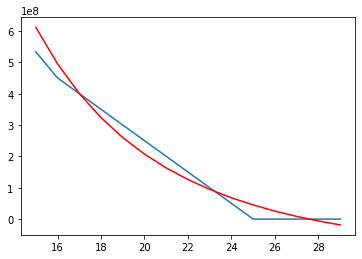

In [153]:
plt.plot(k,q)
k_ = np.array(k)
plt.plot(k, alpha/k_ + beta/k_**2, color = "red")

In [145]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
beta = reg.intercept_
alpha = reg.coef_

In [146]:
X = np.array(k).reshape((-1,1))
y = np.array(q) * (np.array(k) ** 2)

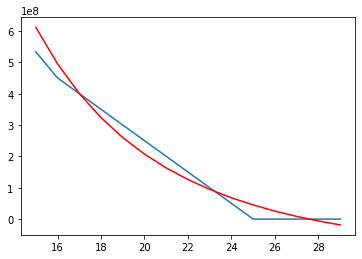

In [154]:
plt.plot(k,q)
k_ = np.array(k)
plt.plot(k, alpha/k_ + beta/k_**2, color = "red")